In [60]:
from dotenv import load_dotenv
import os

load_dotenv()
PINECONE_API_KEY = os.environ['PINECONE_API_KEY']


# index 생성

In [61]:
from pinecone import Pinecone
#클라이언트 생성
pinecone_client = Pinecone(api_key=PINECONE_API_KEY)

In [3]:
pinecone_client

In [4]:
from pinecone import ServerlessSpec
pinecone_client.create_index(
    name='embedding-3d',
    dimension=3,
    metric='cosine',
    spec=ServerlessSpec(
        cloud='aws',
        region='us-east-1'
    )
)

{
    "name": "embedding-3d",
    "metric": "cosine",
    "host": "embedding-3d-147ea7t.svc.aped-4627-b74a.pinecone.io",
    "spec": {
        "serverless": {
            "cloud": "aws",
            "region": "us-east-1"
        }
    },
    "status": {
        "ready": true,
        "state": "Ready"
    },
    "vector_type": "dense",
    "dimension": 3,
    "deletion_protection": "disabled",
    "tags": null
}

In [62]:
index = pinecone_client.Index('embedding-3d')
index

In [69]:
index.describe_index_stats()

{'dimension': 3,
 'index_fullness': 0.0,
 'metric': 'cosine',
 'namespaces': {'': {'vector_count': 1},
                'embedding-3d-nsl': {'vector_count': 6}},
 'total_vector_count': 7,
 'vector_type': 'dense'}

In [7]:
for ids in index.list(namespace='embedding-3d-nsl'):
    print(ids)

# pinecone data 형식
[{'id' : 'vec1' , 'values' :[1.0,1.5,2.0] , metadata' : {'genre':'drama'}},
{'id' : 'vec1' , 'values' :[2.0,1.5,0.5] , metadata' : {'genre':'action'}},
{'id' : 'vec1' , 'values' :[0.1,1.5,2.0] , metadata' : {'genre':'comic'}},
{'id' : 'vec1' , 'values' :[1.0,2.5,3.5] , metadata' : {'genre':'drama'}},
{'id' : 'vec1' , 'values' :[3.0,1.2,1.3] , metadata' : {'genre':'action'}},
{'id' : 'vec1' , 'values' :[0.3,1.1,2.5] , metadata' : {'genre':'comic'}}
]

In [9]:
index.upsert(
    vectors=[
        {'id': 'vec1', 'values': [1.0, 1.5, 2.0], 'metadata': {'genre': 'drama'}},
        {'id': 'vec2', 'values': [2.0, 1.5, 0.5], 'metadata': {'genre': 'action'}},
        {'id': 'vec3', 'values': [0.1, 1.5, 2.0], 'metadata': {'genre': 'comic'}},
        {'id': 'vec4', 'values': [1.0, 2.5, 3.5], 'metadata': {'genre': 'drama'}},
        {'id': 'vec5', 'values': [3.0, 1.2, 1.3], 'metadata': {'genre': 'action'}},
        {'id': 'vec6', 'values': [0.3, 1.1, 2.5], 'metadata': {'genre': 'comic'}}
    ],
    namespace='embedding-3d-nsl'
)


{'upserted_count': 6}

In [63]:
index.describe_index_stats()

{'dimension': 3,
 'index_fullness': 0.0,
 'metric': 'cosine',
 'namespaces': {'': {'vector_count': 1},
                'embedding-3d-nsl': {'vector_count': 6}},
 'total_vector_count': 7,
 'vector_type': 'dense'}

# id list

In [64]:
for ids in index.list(namespace='embedding-3d-nsl'):
    print(ids)

['vec1', 'vec2', 'vec3', 'vec4', 'vec5', 'vec6']


# query

In [13]:
response = index.query(
    namespace='embedding-3d-nsl',
    vector=[0.1, 0.4, 0.7],
    top_k=3,
    include_values=True,
    include_metadata=True,
    filter={'genre': {'$eq':'drama'}}
)
response

{'matches': [{'id': 'vec4',
              'metadata': {'genre': 'drama'},
              'score': 0.990372956,
              'values': [1.0, 2.5, 3.5]},
             {'id': 'vec1',
              'metadata': {'genre': 'drama'},
              'score': 0.961182,
              'values': [1.0, 1.5, 2.0]}],
 'namespace': 'embedding-3d-nsl',
 'usage': {'read_units': 1}}

In [71]:
ns = 'embedding-3d-nsl'
for ids in index.list(namespace=ns):
  print(ids)

['vec1', 'vec2', 'vec3', 'vec4', 'vec5', 'vec6']


# fetch

In [72]:
from itertools import chain
all_ids = list(chain.from_iterable(index.list(namespace=ns)))
resp = index.fetch(ids=all_ids, namespace=ns)
resp

FetchResponse(namespace='embedding-3d-nsl', vectors={'vec1': Vector(id='vec1', values=[1.0, 1.5, 2.0], metadata={'genre': 'drama'}, sparse_values=None), 'vec2': Vector(id='vec2', values=[2.0, 1.5, 0.5], metadata={'genre': 'action'}, sparse_values=None), 'vec3': Vector(id='vec3', values=[0.1, 1.5, 2.0], metadata={'genre': 'comic'}, sparse_values=None), 'vec6': Vector(id='vec6', values=[0.3, 1.1, 2.5], metadata={'genre': 'comic'}, sparse_values=None), 'vec4': Vector(id='vec4', values=[1.0, 2.5, 3.5], metadata={'genre': 'drama'}, sparse_values=None), 'vec5': Vector(id='vec5', values=[3.0, 1.2, 1.3], metadata={'genre': 'action'}, sparse_values=None)}, usage={'read_units': 1})

In [73]:
all_ids

['vec1', 'vec2', 'vec3', 'vec4', 'vec5', 'vec6']

In [74]:
resp.vectors

{'vec1': Vector(id='vec1', values=[1.0, 1.5, 2.0], metadata={'genre': 'drama'}, sparse_values=None),
 'vec2': Vector(id='vec2', values=[2.0, 1.5, 0.5], metadata={'genre': 'action'}, sparse_values=None),
 'vec3': Vector(id='vec3', values=[0.1, 1.5, 2.0], metadata={'genre': 'comic'}, sparse_values=None),
 'vec6': Vector(id='vec6', values=[0.3, 1.1, 2.5], metadata={'genre': 'comic'}, sparse_values=None),
 'vec4': Vector(id='vec4', values=[1.0, 2.5, 3.5], metadata={'genre': 'drama'}, sparse_values=None),
 'vec5': Vector(id='vec5', values=[3.0, 1.2, 1.3], metadata={'genre': 'action'}, sparse_values=None)}

In [75]:
for vid, v in resp.vectors.items():
  vid, v.values

# page - 1개 벡터씩 꺼내기

In [76]:
for id_page in index.list(namespace=ns):
  print('*',id_page)
  resp = index.fetch(ids=id_page, namespace=ns)
  for vid, v in resp.vectors.items():
    print(vid, v.values)

* ['vec1', 'vec2', 'vec3', 'vec4', 'vec5', 'vec6']
vec4 [1.0, 2.5, 3.5]
vec1 [1.0, 1.5, 2.0]
vec5 [3.0, 1.2, 1.3]
vec2 [2.0, 1.5, 0.5]
vec6 [0.3, 1.1, 2.5]
vec3 [0.1, 1.5, 2.0]


# 새로운 쿼리벡터 추가하기

In [77]:
ids = list(resp.vectors.keys())
values = [vec.values for vec in resp.vectors.values()]

In [78]:
ids.append('qv')
values.append([0.1,0.3,0.7]) #dimension 일치

# 시각화

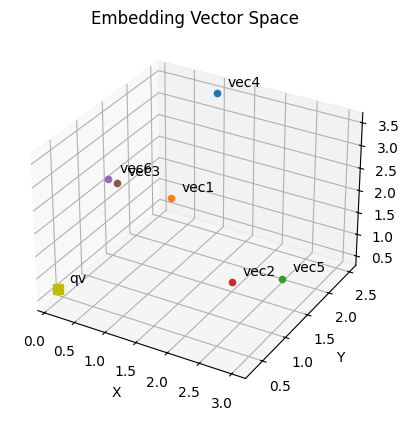

In [79]:
import matplotlib.pyplot as plt

# 3D 플롯을 생성합니다.
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# 각 벡터의 ID와 값을 사용하여 3D 공간에 점을 그립니다.
for i, id in enumerate(ids):
    if id == "qv":
        # 쿼리 벡터는 노란색 사각형으로 표시합니다.
        ax.scatter(values[i][0], values[i][1], values[i][2], label=id, color='y', s=50, marker='s')
        ax.text(values[i][0] + 0.1, values[i][1] + 0.1, values[i][2] + 0.1, id)
    else:
        # 나머지 벡터는 기본 색상으로 표시합니다.
        ax.scatter(values[i][0], values[i][1], values[i][2], label=id)
        ax.text(values[i][0] + 0.1, values[i][1] + 0.1, values[i][2] + 0.1, id)

# 축 레이블과 제목을 설정합니다.
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Embedding Vector Space')

# 플롯을 표시합니다.
plt.show()

# 임베딩 미션

name: "quickstart" 서버리스 인덱스 생성    
dim: 1024,

In [91]:
data = [
    {"id": "vec1", "text": "사과는 달콤하고 아삭한 식감으로 유명한 인기 있는 과일입니다."},
    {"id": "vec2", "text": "애플이라는 기술 회사는 아이폰과 같은 혁신적인 제품으로 유명합니다."},
    {"id": "vec3", "text": "많은 사람들이 건강한 간식으로 사과를 즐겨 먹습니다."},
    {"id": "vec4", "text": "애플 주식회사는 세련된 디자인과 사용자 친화적인 인터페이스로 기술 산업을 혁신했습니다."},
    {"id": "vec5", "text": "하루에 사과 하나면 의사를 멀리할 수 있다는 속담이 있습니다."},
    {"id": "vec6", "text": "애플 컴퓨터 회사는 1976년 4월 1일 스티브 잡스, 스티브 워즈니악, 로널드 웨인에 의해 파트너십으로 설립되었습니다."},
    {"id": "vec8", "text": "애플은 세계에서 가장 높은 브랜드 가치를 가진 기업 중 하나로 평가받고 있습니다."},
    {"id": "vec9", "text": "아이폰은 애플이 출시한 대표적인 스마트폰으로 전 세계적으로 큰 인기를 끌고 있습니다."},
    {"id": "vec10", "text": "애플의 맥북 시리즈는 세련된 디자인과 강력한 성능으로 많은 전문가들이 사용합니다."},
    {"id": "vec11", "text": "애플워치는 건강 관리와 피트니스 기능으로 스마트워치 시장을 선도하고 있습니다."},
    {"id": "vec12", "text": "애플은 자사 생태계 내 기기들 간의 높은 호환성과 연동성을 강점으로 내세웁니다."},
    {"id": "vec13", "text": "애플의 앱스토어는 전 세계 개발자들이 만든 수많은 앱을 제공하는 플랫폼입니다."},
    {"id": "vec14", "text": "애플은 프라이버시 보호를 핵심 가치로 삼아 사용자 데이터를 안전하게 관리합니다."},
    {"id": "vec15", "text": "스티브 잡스는 애플의 공동 창업자로 혁신적인 비전을 통해 회사를 세계적 기업으로 성장시켰습니다."}

]

임베딩 모델 : multilingual-e5-large   
upsert()   
describe_index_stats()   
query_vector : "애플이라는 기술 회사에 대해 알려주세요."    
index.query()

In [95]:
embeddings = pinecone_client.inference.embed(
    model="multilingual-e5-large",
    inputs=[d["text"] for d in data],
    parameters={"input_type": "passage", "truncate": "END"}
)

embeddings[0]

{'vector_type': dense, 'values': [0.0301055908203125, -0.0206298828125, ..., -0.0303802490234375, 0.0241546630859375]}

In [88]:
from pinecone import ServerlessSpec

pinecone_client.create_index(
    name='quickstart',
    dimension=1024,
    metric='cosine',
    spec=ServerlessSpec(
        cloud='aws',
        region='us-east-1'
    )
)

{
    "name": "quickstart",
    "metric": "cosine",
    "host": "quickstart-147ea7t.svc.aped-4627-b74a.pinecone.io",
    "spec": {
        "serverless": {
            "cloud": "aws",
            "region": "us-east-1"
        }
    },
    "status": {
        "ready": true,
        "state": "Ready"
    },
    "vector_type": "dense",
    "dimension": 1024,
    "deletion_protection": "disabled",
    "tags": null
}

In [89]:
index = pinecone_client.Index("quickstart")

In [93]:
index.describe_index_stats()

{'dimension': 1024,
 'index_fullness': 0.0,
 'metric': 'cosine',
 'namespaces': {},
 'total_vector_count': 0,
 'vector_type': 'dense'}

In [97]:
from sentence_transformers import SentenceTransformer

# multilingual-e5-large 임베딩 모델 불러오기
model = SentenceTransformer("intfloat/multilingual-e5-large")

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.
0it [00:00, ?it/s]
c:\Users\LENOVO\miniconda3\envs\prompting_env\Lib\site-packages\huggingface_hub\file_download.py:143: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\LENOVO\.cache\huggingface\hub\models--intfloat--multilingual-e5-large. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to a

In [99]:
vectors = []
for item in data:
    embedding = model.encode(item["text"]).tolist()
    vectors.append({
        "id": item["id"],
        "values": embedding,
        "metadata": {"text": item["text"]}
    })


In [100]:
print(vectors[0]["id"])
print(len(vectors[0]["values"]))
print(vectors[0]["values"][:10]) 

vec1
1024
[0.031203143298625946, -0.011677904985845089, 0.006053735967725515, -0.028356090188026428, 0.02643781341612339, -0.04365314915776253, -0.0072122965939342976, 0.07913167774677277, 0.02140863798558712, -0.01638714224100113]


In [101]:
index.upsert(vectors=vectors)

{'upserted_count': 14}

In [103]:
print(len(vectors[0]["values"]))

1024


In [ ]:
# data 불러오기
query_text = "애플이라는 기술 회사에 대해 알려주세요."
query_vector = model.encode(query_text).tolist()

result = index.query(
    vector=query_vector,
    top_k=5,
    include_metadata=True
)

for match in result["matches"]:
    print(f"ID: {match['id']}, Score: {match['score']:.4f}")
    print(f"Text: {match['metadata']['text']}")
    print("-" * 50)


ID: vec2, Score: 0.9059
Text: 애플이라는 기술 회사는 아이폰과 같은 혁신적인 제품으로 유명합니다.
--------------------------------------------------
ID: vec4, Score: 0.8865
Text: 애플 주식회사는 세련된 디자인과 사용자 친화적인 인터페이스로 기술 산업을 혁신했습니다.
--------------------------------------------------
ID: vec8, Score: 0.8573
Text: 애플은 세계에서 가장 높은 브랜드 가치를 가진 기업 중 하나로 평가받고 있습니다.
--------------------------------------------------
ID: vec6, Score: 0.8537
Text: 애플 컴퓨터 회사는 1976년 4월 1일 스티브 잡스, 스티브 워즈니악, 로널드 웨인에 의해 파트너십으로 설립되었습니다.
--------------------------------------------------
ID: vec9, Score: 0.8529
Text: 아이폰은 애플이 출시한 대표적인 스마트폰으로 전 세계적으로 큰 인기를 끌고 있습니다.
--------------------------------------------------
